### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [161]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [162]:
data = pd.read_csv('admission.csv')

In [163]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [164]:
data.shape

(500, 9)

In [165]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [167]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [168]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [169]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [170]:
data.describe(include=[np.number])

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [171]:
data.shape

(500, 9)

In [172]:
data.corr().round(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00,-0.10,-0.14,-0.07,-0.14,-0.00,-0.07,-0.01,0.01
GRE Score,-0.10,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL Score,-0.14,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University Rating,-0.07,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,-0.14,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,-0.00,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,-0.07,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,-0.01,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.01,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


<Axes: >

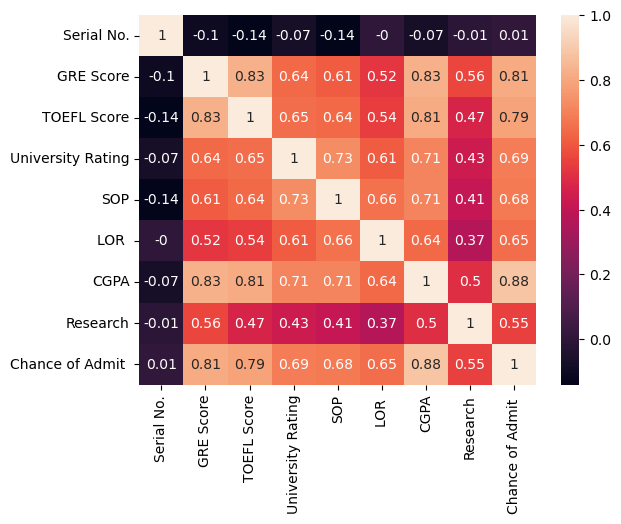

In [173]:
sns.heatmap(data.corr().round(2),annot=True)

In [174]:
corr_matrix = data.corr()

In [175]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [176]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

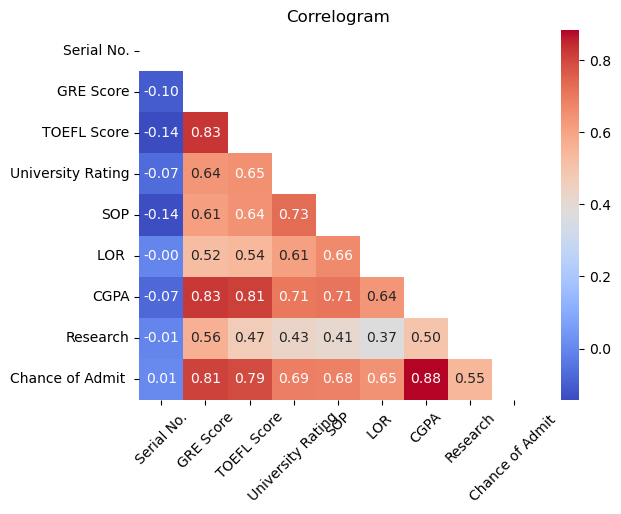

In [177]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlogram")
plt.xticks(rotation=45)
plt.show()

### Q.2 Find out the minimum and maximum values for GRE score


<Axes: xlabel='GRE Score', ylabel='Count'>

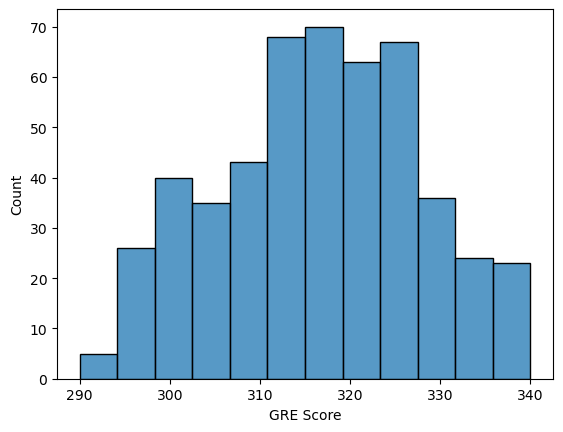

In [178]:
sns.histplot(data["GRE Score"])

In [179]:
data["GRE Score"].min()

290

In [180]:
data["GRE Score"].max()

340

### Q.3 Find out the percentage of universities for each university rating

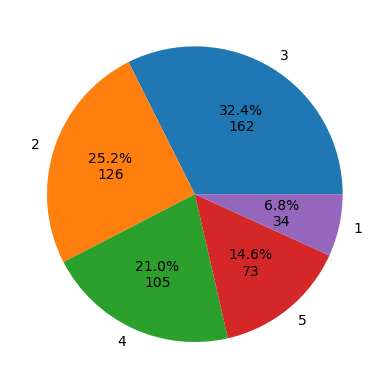

In [181]:
total = data['University Rating'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(data['University Rating'].value_counts().values, labels=data['University Rating'].value_counts().index, autopct=fmt)
plt.show()

### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [182]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [183]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [184]:
data["Chance of Admit "]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [186]:
data.loc[data['Chance of Admit '] <= 0.8, 'Chance of Admit '] = 0
data.loc[data['Chance of Admit '] > 0.8, 'Chance of Admit '] = 1

In [187]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [189]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [191]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Chance of Admit '])
data = encoder.fit_transform(data)
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,2
2,3,316,104,3,3.0,3.5,8.00,1,2
3,4,322,110,3,3.5,2.5,8.67,1,2
4,5,314,103,2,2.0,3.0,8.21,0,2


In [192]:
x=data.drop(['Chance of Admit '],axis=1)
y=data['Chance of Admit '].values

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [194]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [195]:
print("Decision Tree Classifier : {:.2f}%".format(dtc.score(x_test,y_test)*100))

Decision Tree Classifier : 91.33%


In [196]:
predictions=dtc.predict(x_test)

In [197]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
conf_matrix=confusion_matrix(y_test,predictions)

In [198]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
conf_matrix=confusion_matrix(y_test,predictions)
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
conf_matrix=confusion_matrix(y_test,predictions)
print(conf_matrix)

[[ 29   6]
 [  7 108]]


<Axes: >

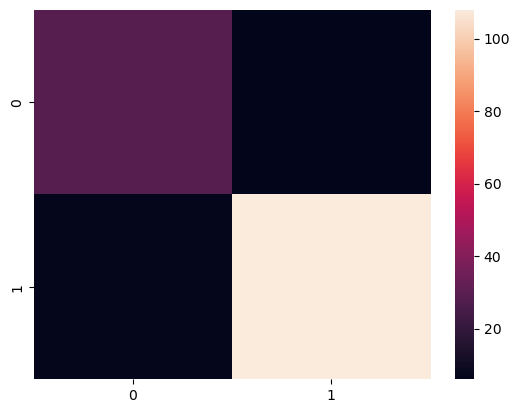

In [199]:
sns.heatmap(conf_matrix)

In [200]:
# Decision Tree Classifier(Hyper parameter tuning)
dtc1=DecisionTreeClassifier(max_depth=4)

In [201]:
dtc1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [202]:
## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
## On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
## print("Decision Tree Classifier with max depth 4 : {:.2f}%".format(dtc1.score(

In [203]:
print("Decision Tree Classifier with max depth 4 : {:.2f}%".format(dtc1.score(x_test,y_test)*100))

Decision Tree Classifier with max depth 4 : 92.67%


In [204]:
predictions2=dtc1.predict(x_test)

In [205]:
conf_matrix2=confusion_matrix(y_test,predictions2)

In [206]:
print(conf_matrix2)

[[ 30   5]
 [  6 109]]


In [207]:
print(dtc1.score(x_train, y_train))
print(dtc1.score(x_test,y_test))

0.9571428571428572
0.9266666666666666


In [208]:
### Post Prunning Technique

In [209]:
treemodel=DecisionTreeClassifier()

In [210]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4108231707317073, 0.9375, 'x[6] <= 8.92\ngini = 0.425\nsamples = 350\nvalue = [107, 243]'),
 Text(0.16463414634146342, 0.8125, 'x[1] <= 319.5\ngini = 0.082\nsamples = 232\nvalue = [10, 222]'),
 Text(0.04878048780487805, 0.6875, 'x[6] <= 8.765\ngini = 0.021\nsamples = 189\nvalue = [2, 187]'),
 Text(0.024390243902439025, 0.5625, 'gini = 0.0\nsamples = 181\nvalue = [0, 181]'),
 Text(0.07317073170731707, 0.5625, 'x[6] <= 8.775\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.04878048780487805, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0975609756097561, 0.4375, 'x[5] <= 3.75\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.07317073170731707, 0.3125, 'x[5] <= 3.25\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04878048780487805, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0975609756097561, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12195121951219512, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.280487804

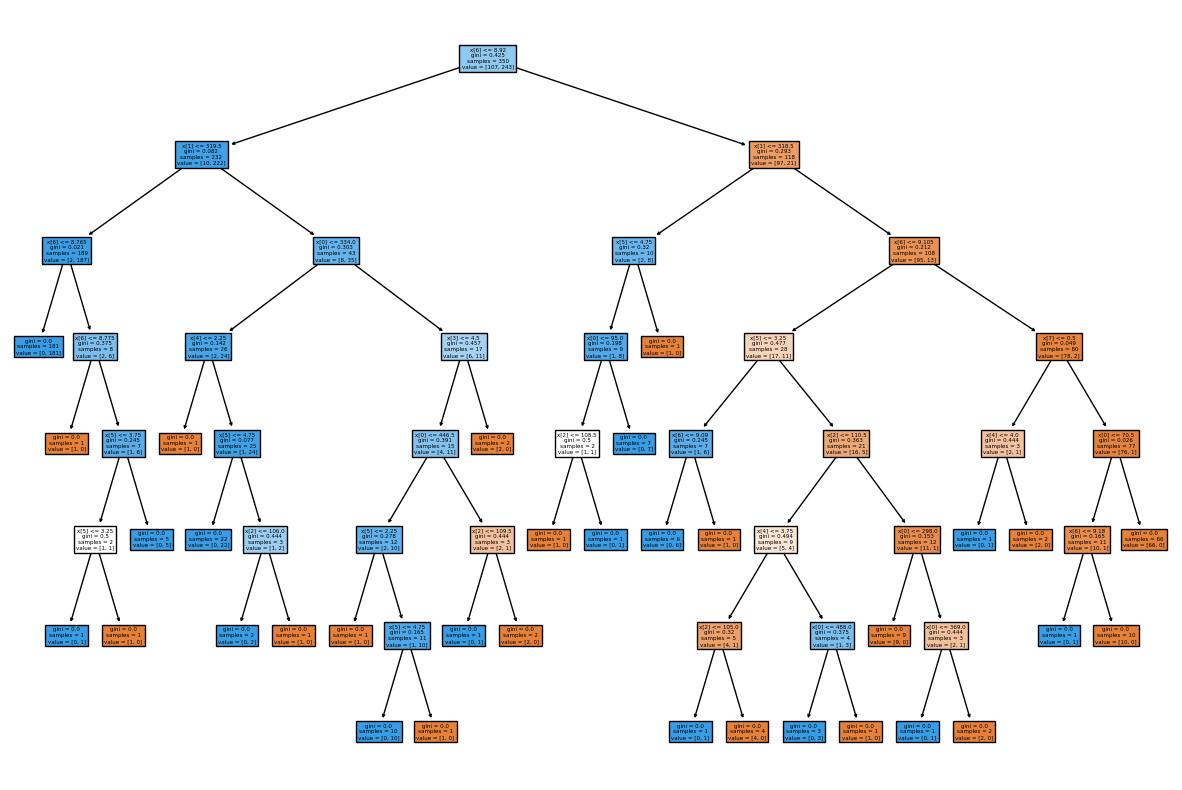

In [211]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [212]:
treemodel2=DecisionTreeClassifier(max_depth=4)

In [213]:
treemodel2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.48, 0.9, 'x[6] <= 8.92\ngini = 0.425\nsamples = 350\nvalue = [107, 243]'),
 Text(0.22, 0.7, 'x[1] <= 319.5\ngini = 0.082\nsamples = 232\nvalue = [10, 222]'),
 Text(0.08, 0.5, 'x[6] <= 8.765\ngini = 0.021\nsamples = 189\nvalue = [2, 187]'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 181\nvalue = [0, 181]'),
 Text(0.12, 0.3, 'x[6] <= 8.775\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.36, 0.5, 'x[0] <= 334.0\ngini = 0.303\nsamples = 43\nvalue = [8, 35]'),
 Text(0.28, 0.3, 'x[4] <= 2.25\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.24, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.32, 0.1, 'gini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.44, 0.3, 'x[0] <= 341.0\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.48, 0.1, 'gini = 0.391\nsamples = 15\nvalue = [4, 11

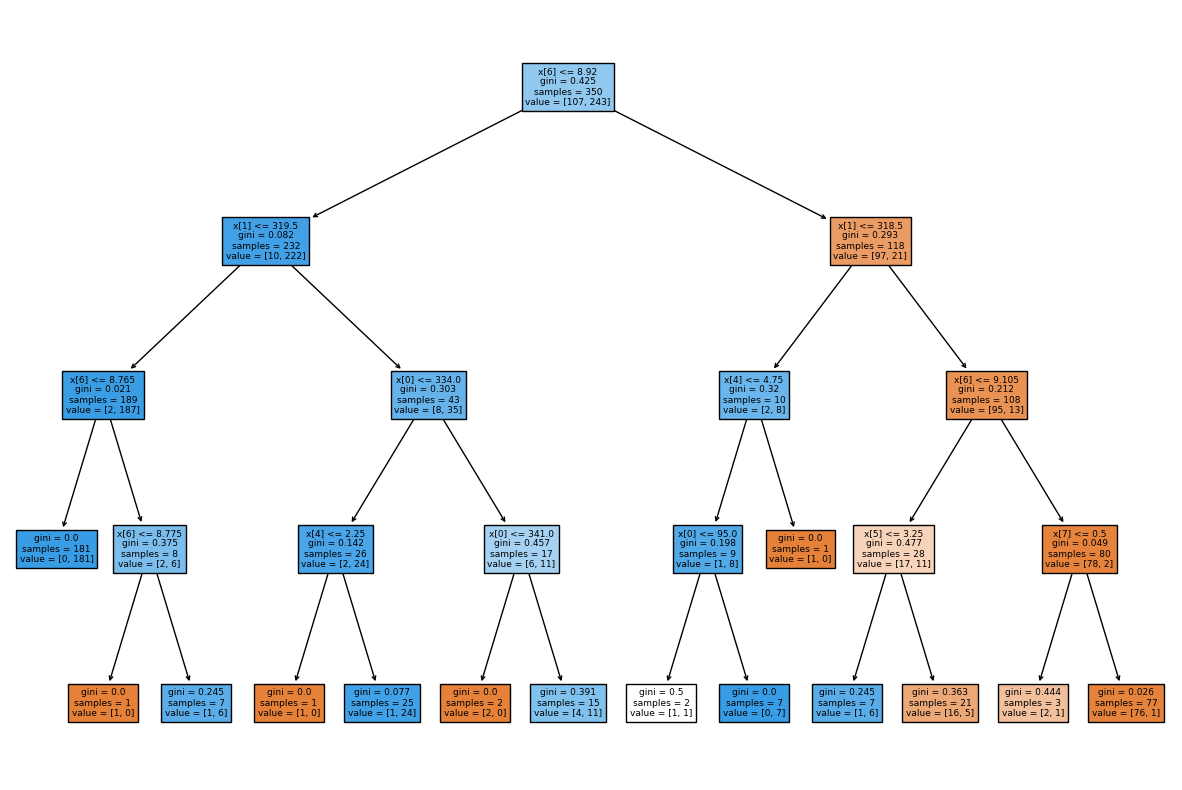

In [214]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel2,filled=True)

In [215]:
### Pre Tuning


In [216]:
parameter={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5],
    "max_features":["auto","sqrt","log2"]
}

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
treemodel6=DecisionTreeClassifier(max_depth=4)

In [231]:
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [232]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [233]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [234]:
y_test

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1])

In [235]:
y_pred=cv.predict(x_test)

In [236]:
y_pred

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1])

In [237]:
score=accuracy_score(y_pred,y_test)

In [238]:
score

0.94

In [239]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.89      0.86      0.87        36
           2       0.96      0.96      0.96       114

    accuracy                           0.94       150
   macro avg       0.92      0.91      0.92       150
weighted avg       0.94      0.94      0.94       150



In [240]:
#  In original one its score was 91.33% after Hyperparameter tuning it has increased in some cases to 92% and further decreased to even 90%